# Deep Learning Assignment 1  

SID: 12012524  
Name: Zhangjie Chen

## Part I

### 1.1  Task 1

Generate a dataset of points in R^2. To do this, define two Gaussian distributions and sample 100 points from each.  
Your dataset should then contain a total of 200 points, 100 from each distribution. Keep 80 points per distribution as the training (160 in total), 20 for the test (40 in total).

In [39]:
# imports
import numpy as np
import perceptron
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

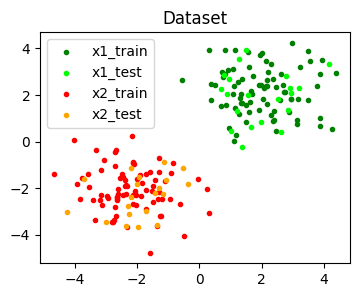

In [40]:
def generate_dataset(mean1, cov1, mean2, cov2):
    # get random points
    x1 = np.random.multivariate_normal(mean=mean1, cov = cov1, size=100)
    x2 = np.random.multivariate_normal(mean=mean2, cov = cov2, size=100)

    x_train1 = x1[:80]
    x_train2 = x2[:80]
    x_test1 = x1[80:]
    x_test2 = x2[80:]

    # train dataset
    x_train = np.concatenate((x_train1, x_train2), axis=0)
    y_train = np.concatenate((np.ones(80), np.full(80, -1)))

    # test dataset
    x_test = np.concatenate((x_test1, x_test2), axis=0)
    y_test = np.concatenate((np.ones(20), np.full(20, -1)))

    # plot
    plt.figure(figsize=(4,3))
    plt.scatter(x_train1[:, 0], x_train1[:, 1], color='green', label='x1_train', marker='.')
    plt.scatter(x_test1[:, 0], x_test1[:, 1], color='lime',label='x1_test', marker='.')
    plt.scatter(x_train2[:, 0], x_train2[:, 1], color='red',label='x2_train', marker='.')
    plt.scatter(x_test2[:, 0], x_test2[:, 1], color='orange',label='x2_test', marker='.')
    plt.title('Dataset')
    plt.legend()

    return x_train, y_train, x_test, y_test


# When the means of the two Gaussians are too close:
# x_train, y_train, x_test, y_test = generate_dataset([2, 2], [[1, 0], [0, 1]], [1, 1], [[1, 0], [0, 1]])

# When the variances are too high:
# x_train, y_train, x_test, y_test = generate_dataset([-2, -2], [[5, 0], [0, 5]], [2, 2], [[5, 0], [0, 5]])

# normal case
x_train, y_train, x_test, y_test = generate_dataset([2, 2], [[1, 0], [0, 1]], [-2, -2], [[1, 0], [0, 1]])

### 1.2  Task 2

Implement the perceptron following the specs in perceptron.py and the stantard algorithm section in perceptron tutorial.pdf.

In [41]:
# see perceptron.py
# get instance
pcpt = perceptron.Perceptron(n_inputs=2, max_epochs=10, learning_rate=0.01)

### 1.3  Task 3

Train the perceptron on the training data (160 points) and test in on the remaining 40 test points. Compute the classification accuracy on the test set.

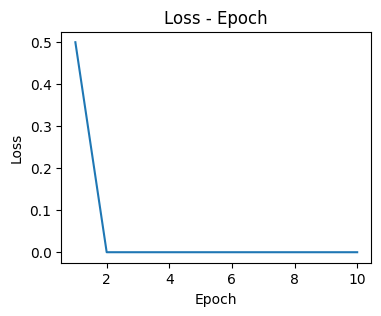

In [42]:
# train input: x_train, label input: y_train
loss = pcpt.train(x_train, y_train)
plt.figure(figsize=(4,3))
plt.plot(range(1, len(loss) + 1), loss)
plt.title('Loss - Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

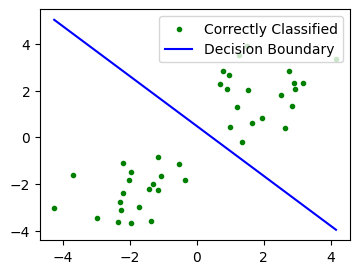

accuracy = 1.0


In [43]:
# predict on the test dataset
test_pred = pcpt.forward(x_test)
correct_pred = np.sum(test_pred == y_test)
accuracy = correct_pred / len(y_test)

# plot classification result
plt.figure(figsize=(4,3))

correct = []
incorrect = []

for i in range(len(y_test)):
    if test_pred[i] == y_test[i]:
        correct.append(x_test[i])
    else:
        incorrect.append(x_test[i])

correct = np.array(correct)
incorrect = np.array(incorrect)

if len(correct) > 0:
    plt.scatter(correct[:, 0], correct[:, 1], color='green', label='Correctly Classified', marker='.')
if len(incorrect) > 0:
    plt.scatter(incorrect[:, 0], incorrect[:, 1], color='red', label='Incorrectly Classified', marker='.')

# plot model boundary line
slope = -pcpt.weights[1] / pcpt.weights[2]
intercept = -pcpt.weights[0] / pcpt.weights[2]

x_values = np.linspace(np.min(x_test[:, 0]), np.max(x_test[:, 0]), 1000)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='b', label='Decision Boundary')


plt.legend()
plt.show()

# show accuracy
print("accuracy =", len(correct)/len(y_test))

### 1.4 Task 4

Experiment with different sets of points (generated as described in Task 1). What happens during the training if the means of the two Gaussians are too close and/or if their variance is too high?

In [44]:
# When the means of the two Gaussians are too close:
# x_train, y_train, x_test, y_test = generate_dataset([2, 2], [[1, 0], [0, 1]], [1, 1], [[1, 0], [0, 1]])

# When the variances are too high:
# x_train, y_train, x_test, y_test = generate_dataset([-2, -2], [[5, 0], [0, 5]], [2, 2], [[5, 0], [0, 5]])